
#### Install necessary packages if not installed already


In [4]:
# pip install selenium
# pip install webdriver_manager


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



## Web Scrapping


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

In [8]:
service = Service(r'C:\Users\Public\Downloads\chromedriver-win32\chromedriver.exe')
driver = webdriver.Chrome(service=service)


In [9]:
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Ahonda&sort=bestmatch&serveWarrantyCount=true&listingSource=TabFilter&storeCityId=2378"
driver.get(url)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00007FF79F39EEA2+31554]
	(No symbol) [0x00007FF79F317ED9]
	(No symbol) [0x00007FF79F1D872A]
	(No symbol) [0x00007FF79F1AD995]
	(No symbol) [0x00007FF79F2544D7]
	(No symbol) [0x00007FF79F26C051]
	(No symbol) [0x00007FF79F24CDD3]
	(No symbol) [0x00007FF79F21A33B]
	(No symbol) [0x00007FF79F21AED1]
	GetHandleVerifier [0x00007FF79F6A8B1D+3217341]
	GetHandleVerifier [0x00007FF79F6F5AE3+3532675]
	GetHandleVerifier [0x00007FF79F6EB0E0+3489152]
	GetHandleVerifier [0x00007FF79F44E776+750614]
	(No symbol) [0x00007FF79F32375F]
	(No symbol) [0x00007FF79F31EB14]
	(No symbol) [0x00007FF79F31ECA2]
	(No symbol) [0x00007FF79F30E16F]
	BaseThreadInitThunk [0x00007FFAC74D257D+29]
	RtlUserThreadStart [0x00007FFAC7BCAF28+40]


In [11]:
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait for new data to load
    time.sleep(5)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [12]:

# Get page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')


In [13]:
soup

<html lang="en-IN"><head>
<link href="https://assets.cars24.com" rel="preconnect"/>
<link href="https://fastly-production.24c.in" rel="preconnect"/>
<link href="https://connect.facebook.net" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://analytics.twitter.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://www.google.com" rel="preconnect"/>
<link href="https://www.google.co.in" rel="preconnect"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://t.co" rel="preconnect"/>
<link href="https://static.ads-twitter.com" rel="preconnect"/>
<link href="https://tracking.cars24.com" rel="preconnect"/>
<link href="https://www.googleoptimize.com" rel="preconnect"/>
<link href="https://web-sdk.smartlook.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-width, initial-sca

In [14]:
names = []
fuel_types = []
distances = []
transmissions = []
prices = []

# Extract car details
for result in soup.find_all('div', {'class': '_2YB7p'}):
    # Name
    name_element = result.find('h3', {'class': '_11dVb'})
    names.append(name_element.get_text().strip() if name_element else None)
    
    # Details
    details_elements = result.find_all('li')
    fuel_type = None
    distance = None
    transmission = None
    for element in details_elements:
        text = element.get_text().strip()
        if text.endswith('km'):
            distance = text
        elif text.endswith('Petrol') or text.endswith('Diesel'):
            fuel_type = text
        elif text.endswith('Manual') or text.endswith('Automatic'):
            transmission = text
    
    fuel_types.append(fuel_type)
    distances.append(distance)
    transmissions.append(transmission)

# Prices
prices_elements = soup.find_all('strong', {'class': '_3RL-I'})
prices = [element.get_text().strip() for element in prices_elements]

# Close the WebDriver
driver.quit()

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Fuel Type': fuel_types,
    'Distance': distances,
    'Transmission': transmissions,
    'Price': prices
})

# Display DataFrame
df

,Name,Fuel Type,Distance,Transmission,Price
0,2012 Honda Brio V MT,Petrol,"61,764 km",Manual,₹2.47 Lakh
1,2018 Honda WR-V 1.2L I-VTEC VX MT,Petrol,"59,897 km",Manual,₹7.11 Lakh
2,2016 Honda Jazz 1.2L I-VTEC V,Petrol,"36,158 km",Manual,₹4.20 Lakh
3,2019 Honda City 1.5L I-VTEC VX CVT,Petrol,"54,705 km",Automatic,₹9.58 Lakh
4,2011 Honda City 1.5L I-VTEC V AT,Petrol,"65,495 km",Automatic,₹2.76 Lakh
...,...,...,...,...,...
58,2013 Honda Brio VX AT,Petrol,"56,041 km",Automatic,₹3.35 Lakh
59,2018 Honda Amaze 1.2L I-VTEC V CVT,Petrol,"66,269 km",Automatic,₹5.61 Lakh
60,2016 Honda City 1.5L I-VTEC SV,Petrol,"60,664 km",Manual,₹4.96 Lakh
61,2019 Honda Jazz 1.2L I-VTEC VX CVT,Petrol,"46,371 km",Automatic,₹6.59 Lakh



## Data Cleaning


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df['Year of Manufacturing'] = df['Name'].str[:4]
df['Year of Manufacturing']

0     2012
1     2018
2     2016
3     2019
4     2011
      ... 
58    2013
59    2018
60    2016
61    2019
62    2021
Name: Year of Manufacturing, Length: 63, dtype: object

In [19]:
df['Name'] = df['Name'].str[5:]
df['Name'].str.strip()
df['Name']

0                   Honda Brio V MT
1      Honda WR-V 1.2L I-VTEC VX MT
2          Honda Jazz 1.2L I-VTEC V
3     Honda City 1.5L I-VTEC VX CVT
4       Honda City 1.5L I-VTEC V AT
                  ...              
58                 Honda Brio VX AT
59    Honda Amaze 1.2L I-VTEC V CVT
60        Honda City 1.5L I-VTEC SV
61    Honda Jazz 1.2L I-VTEC VX CVT
62    Honda City 1.5L I-VTEC ZX CVT
Name: Name, Length: 63, dtype: object

In [20]:
df['Kilometers Driven'] = df['Distance'].str.replace(' km', '').str.replace(',', '').astype(int)
df['Kilometers Driven']

0     61764
1     59897
2     36158
3     54705
4     65495
      ...  
58    56041
59    66269
60    60664
61    46371
62    22500
Name: Kilometers Driven, Length: 63, dtype: int32

In [21]:
df['Price(in Lakh Rupees)']  = df['Price'].str.replace('₹','').str.replace(' Lakh','').astype(float)
df['Price(in Lakh Rupees)']

0      2.47
1      7.11
2      4.20
3      9.58
4      2.76
      ...  
58     3.35
59     5.61
60     4.96
61     6.59
62    12.06
Name: Price(in Lakh Rupees), Length: 63, dtype: float64

In [22]:
print(df.shape)
df.head()

,Name,Fuel Type,Distance,Transmission,Price,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
0,Honda Brio V MT,Petrol,"61,764 km",Manual,₹2.47 Lakh,2012,61764,2.47
1,Honda WR-V 1.2L I-VTEC VX MT,Petrol,"59,897 km",Manual,₹7.11 Lakh,2018,59897,7.11
2,Honda Jazz 1.2L I-VTEC V,Petrol,"36,158 km",Manual,₹4.20 Lakh,2016,36158,4.20
3,Honda City 1.5L I-VTEC VX CVT,Petrol,"54,705 km",Automatic,₹9.58 Lakh,2019,54705,9.58
4,Honda City 1.5L I-VTEC V AT,Petrol,"65,495 km",Automatic,₹2.76 Lakh,2011,65495,2.76


In [23]:
df = df.drop(columns=['Price' ,'Distance'])

In [24]:
print(df.shape)
df.head()

,Name,Fuel Type,Transmission,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
0,Honda Brio V MT,Petrol,Manual,2012,61764,2.47
1,Honda WR-V 1.2L I-VTEC VX MT,Petrol,Manual,2018,59897,7.11
2,Honda Jazz 1.2L I-VTEC V,Petrol,Manual,2016,36158,4.20
3,Honda City 1.5L I-VTEC VX CVT,Petrol,Automatic,2019,54705,9.58
4,Honda City 1.5L I-VTEC V AT,Petrol,Automatic,2011,65495,2.76


In [25]:
# Creating a new csv file and saving it 

df.to_csv('Cars24_Total_data.csv',index=False)


## Data Analysis



1. Describing the dataset
2. Distribution of car prices with frequency
3. Distribution of kilometers driven with frequency
4. Average price by fuel type
5. Average kilometers driven by transmission type
6. Average price by year of manufacturing
7. Price vs Year of Manufacturing
8. Count of Cars by year of manufacturing
9. Distribution of fuel types
10. Average price by transmission and fuel type

In [7]:
df = pd.read_csv('Cars24_Total_data.csv')

In [8]:
print(df.shape)
df.head()

(63, 6)


,Name,Fuel Type,Transmission,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
0,Honda Brio V MT,Petrol,Manual,2012,61764,2.47
1,Honda WR-V 1.2L I-VTEC VX MT,Petrol,Manual,2018,59897,7.11
2,Honda Jazz 1.2L I-VTEC V,Petrol,Manual,2016,36158,4.20
3,Honda City 1.5L I-VTEC VX CVT,Petrol,Automatic,2019,54705,9.58
4,Honda Brio S MT,Petrol,Manual,2014,89467,2.51


In [9]:
df.describe()

,Year of Manufacturing,Kilometers Driven,Price(in Lakh Rupees)
count,63.000000,63.000000,63.000000
mean,2016.936508,54685.412698,6.279683
std,2.526460,26034.594842,2.190420
min,2011.000000,4980.000000,2.470000
25%,2015.000000,33701.500000,4.810000
50%,2017.000000,55583.000000,6.420000
75%,2018.000000,74736.000000,7.210000
max,2023.000000,106523.000000,13.400000


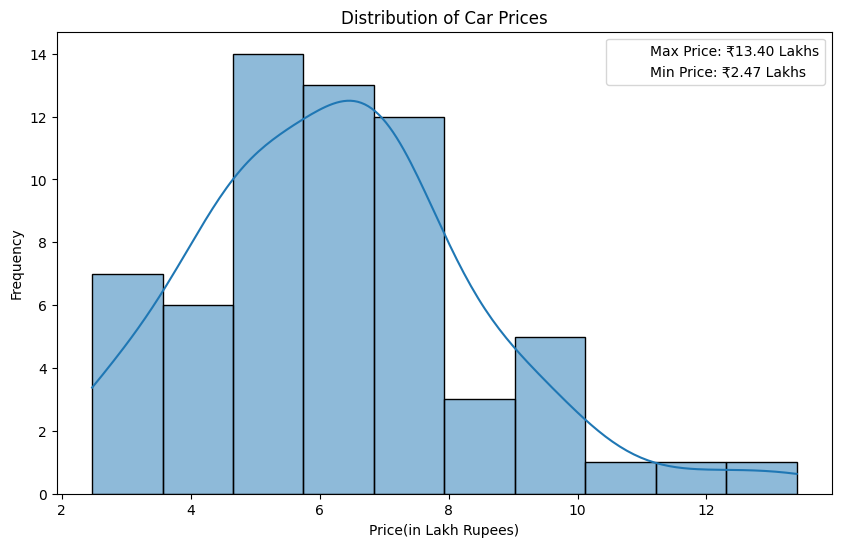

In [10]:
# Find the max and min prices
max_price = df['Price(in Lakh Rupees)'].max()
min_price = df['Price(in Lakh Rupees)'].min()

# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price(in Lakh Rupees)'], kde=True)
plt.plot([], [], ' ', label=f'Max Price: ₹{max_price:,.2f} Lakhs')
plt.plot([], [], ' ', label=f'Min Price: ₹{min_price:,.2f} Lakhs')
plt.legend(loc='upper right')
plt.title('Distribution of Car Prices')
plt.xlabel('Price(in Lakh Rupees)')
plt.ylabel('Frequency')
plt.show()

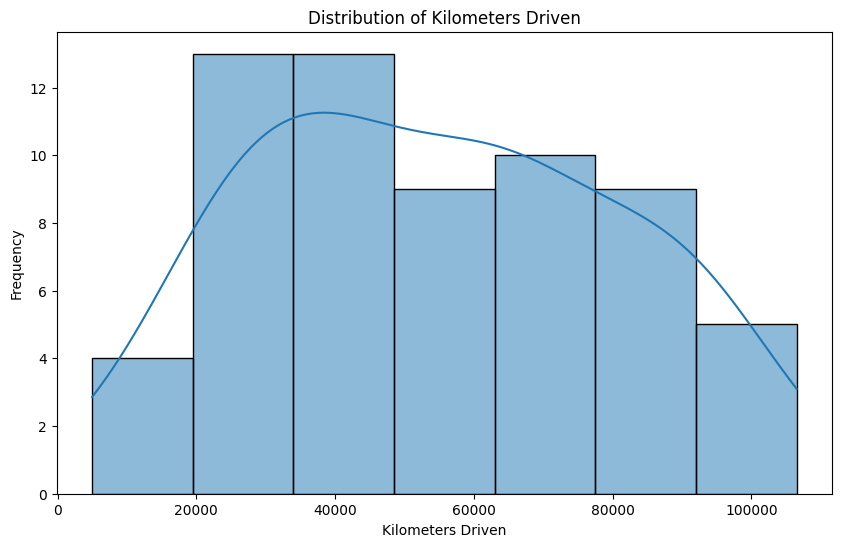

In [11]:
# Plot the distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

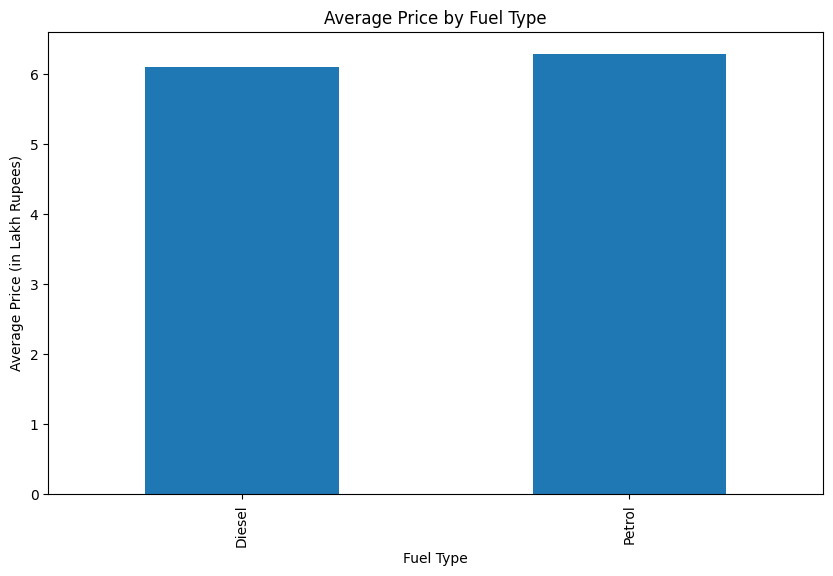

In [12]:
# Calculate average price by fuel type
avg_price_by_fuel = df.groupby('Fuel Type')['Price(in Lakh Rupees)'].mean()

# Plot average price by fuel type
plt.figure(figsize=(10, 6))
avg_price_by_fuel.plot(kind='bar')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (in Lakh Rupees)')
plt.show()

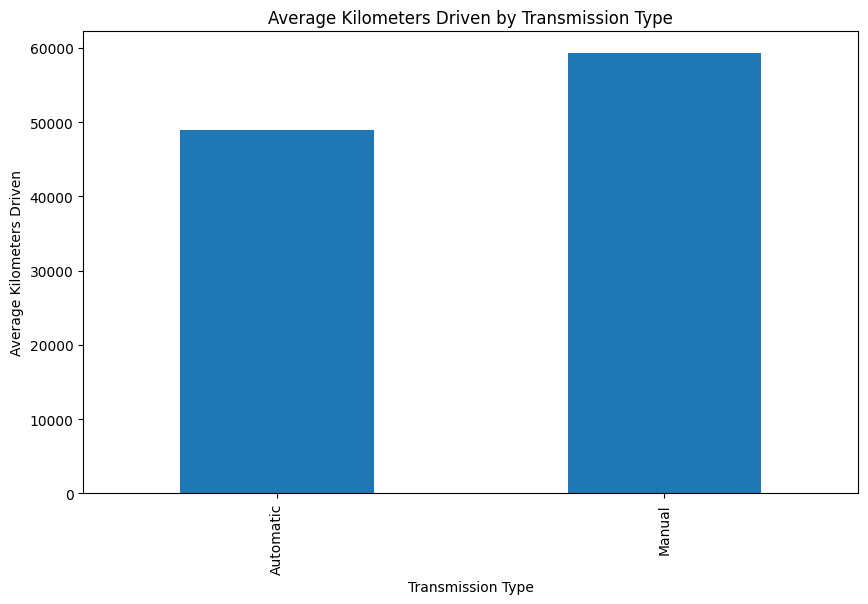

In [13]:
# Calculate average kilometers driven by transmission type
avg_km_by_transmission = df.groupby('Transmission')['Kilometers Driven'].mean()

# Plot average kilometers driven by transmission type
plt.figure(figsize=(10, 6))
avg_km_by_transmission.plot(kind='bar')
plt.title('Average Kilometers Driven by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

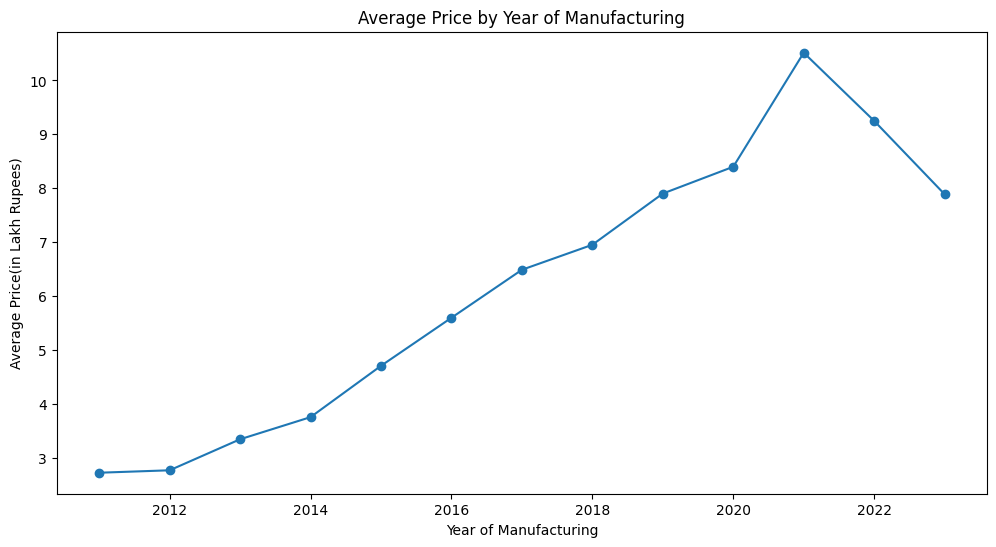

In [14]:
# Calculate average price by year of manufacturing
avg_price_by_year = df.groupby('Year of Manufacturing')['Price(in Lakh Rupees)'].mean()

# Plot average price by year of manufacturing
plt.figure(figsize=(12, 6))
avg_price_by_year.plot(kind='line', marker='o')
plt.title('Average Price by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price(in Lakh Rupees)')
# plt.xticks(rotation=45)
plt.show()

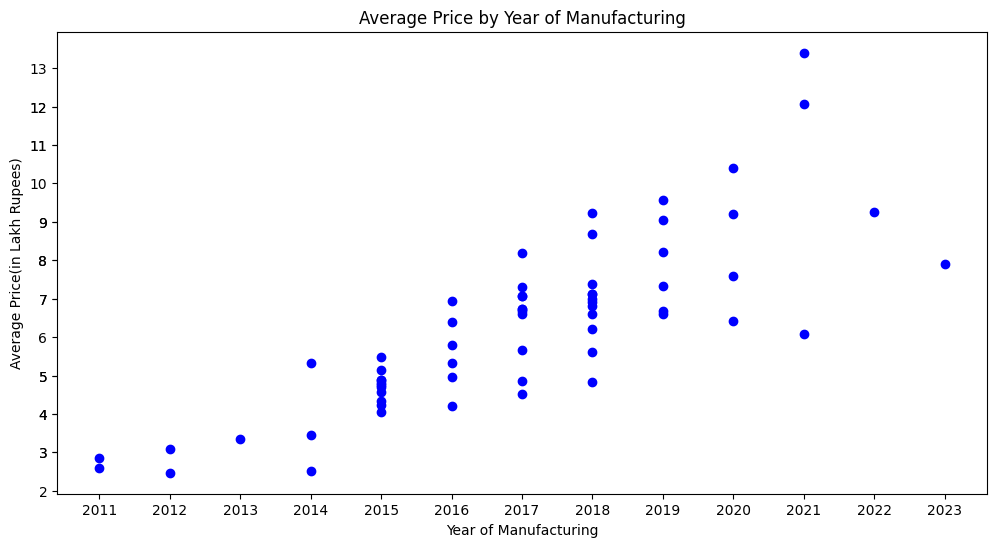

In [15]:
#Scatter plot of Price vs Year of Manufacturing
plt.figure(figsize=(12, 6))
# avg_price_by_year.plot(kind='line', marker='o')
plt.scatter(x=df['Year of Manufacturing'],y=df['Price(in Lakh Rupees)'],c='b')
plt.title('Average Price by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Average Price(in Lakh Rupees)')

x_ticks = np.linspace(df['Year of Manufacturing'].min(),df['Year of Manufacturing'].max(), num =13).astype(int)
y_ticks = np.linspace(df['Price(in Lakh Rupees)'].min(),df['Price(in Lakh Rupees)'].max(), num =20).astype(int)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# plt.xticks(rotation=45)
plt.show()

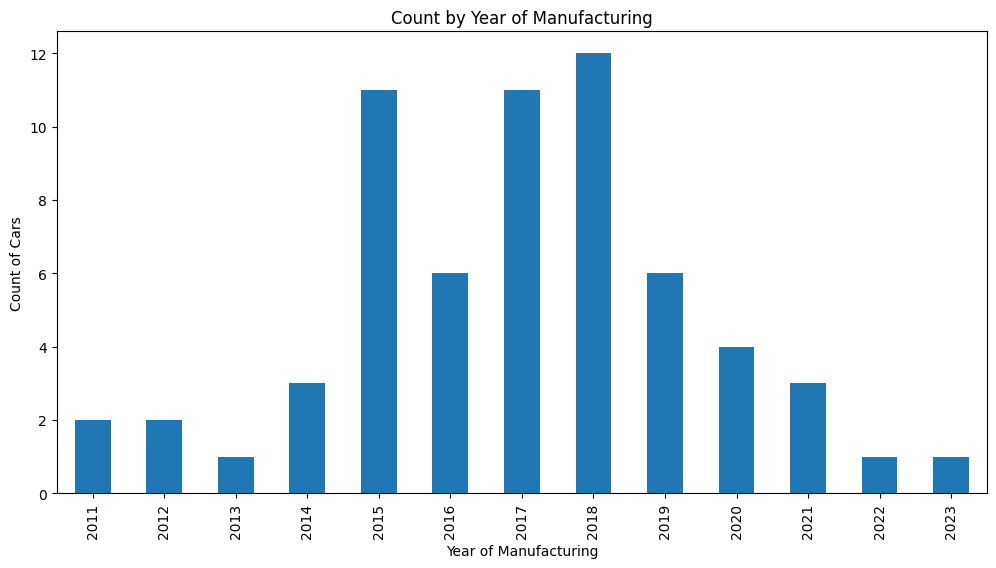

In [16]:
avg_count_by_years = df.groupby('Year of Manufacturing')['Price(in Lakh Rupees)'].count()
# print(avg_count_by_years)

# Plot count by year of manufacturing
plt.figure(figsize=(12, 6))
avg_count_by_years.plot(kind='bar')
# avg_count_by_years.plot(kind='line', marker='o')
plt.title('Count by Year of Manufacturing')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Count of Cars')
# plt.xticks(rotation=45)
plt.show()

Fuel Type
Diesel     2
Petrol    61
Name: Name, dtype: int64


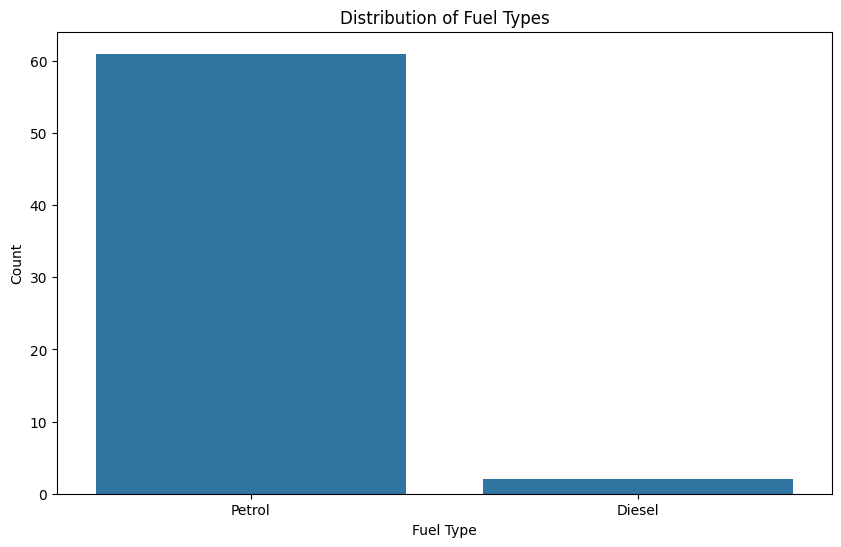

In [17]:
# Plot the distribution of fuel types
count_of_fuel_type = df.groupby('Fuel Type')['Name'].count()
print(count_of_fuel_type)
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type', data=df)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

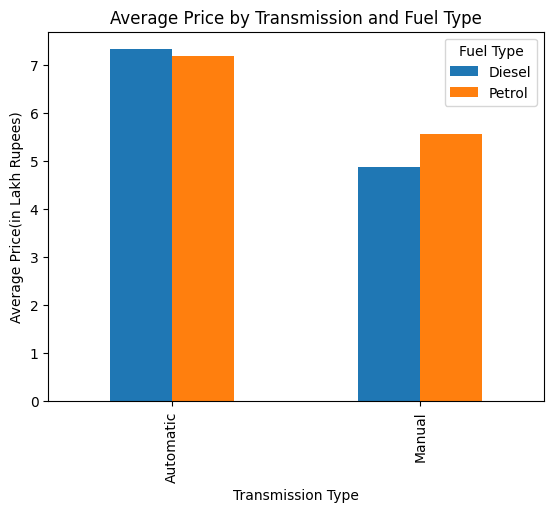

In [18]:
# Calculate average price by transmission and fuel type
avg_price_trans_fuel = df.groupby(['Transmission', 'Fuel Type'])['Price(in Lakh Rupees)'].mean().unstack()

# Plot average price by transmission and fuel type
plt.figure(figsize=(12, 6))
avg_price_trans_fuel.plot(kind='bar')
plt.title('Average Price by Transmission and Fuel Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price(in Lakh Rupees)')
plt.show()


#If we want to see only by Petrol because there are only 2 Diesel Car Type

# avg_price_trans_fuel.Petrol.plot(kind='bar')
# plt.title('Average Price by Transmission and Fuel Type')
# plt.xlabel('Transmission Type')
# plt.ylabel('Average Price(in Lakh Rupees)')
# plt.show()

# Thank You